In [7]:
import numpy as np
import Example_matrices as ex
import dynamic_low_rank as dlr
import time_integration_low_rank as tilr
import Variable_step_size_integrator as vssi
import matplotlib.pyplot as plt

## Spørsmål

- Hvordan skal man kunne teste dlr?
    - hva slags A skal det fungere på
    - testing av Fu, gir matrise med elementer på størrelse $10^{-16}$  
    - (ekstra) hvordan ser man at B = CD.T
    - ks2 blir ikke brukt i time_integration_low_rank
    - hva slags A matise skal vi bruke i 3
    
<br>

- Variable solver er litt rar.
    - kan ikke konvergere da steglengden kun minkes.

In [2]:
# testing av Fu med dlr implementasjon

A = ex.A(0, epsilon = 1/2)
A_dot = ex.A_dot(0, epsilon = 1/2)



k = 10

U, S, V = vssi.construct_U_S_V_0_k(k)

# test av Fu
FUJ = dlr.FU(U,A_dot,V,S)


count 0 j 0 t 0 h 1 u 10.0 v 10.0 s 54.436 

count 1 j 0 t 0 h 0.5 u 10.0 v 10.0 s 54.436 

count 2 j 0 t 0.0 h 0.25 u 10.0 v 10.0 s 54.436 

count 3 j 0 t 0.0 h 0.125 u 10.0 v 10.0 s 54.436 

count 0 j 1 t 0.125 h 0.0875 u 10.0 v 10.0 s 57.863 

count 0 j 2 t 0.2125 h 0.06124999999999999 u 10.0 v 10.0 s 60.351 

count 0 j 3 t 0.27375 h 0.06124999999999999 u 10.0 v 10.0 s 62.092 

count 0 j 4 t 0.33499999999999996 h 0.06124999999999999 u 10.0 v 10.0 s 63.828 

count 0 j 5 t 0.39624999999999994 h 0.06124999999999999 u 10.0 v 10.0 s 65.51 

count 0 j 6 t 0.4574999999999999 h 0.06124999999999999 u 10.0 v 10.0 s 67.114 

count 0 j 7 t 0.5187499999999999 h 0.06124999999999999 u 10.0 v 10.0 s 68.594 

count 0 j 8 t 0.58 h 0.06124999999999999 u 10.0 v 10.0 s 69.95 

count 0 j 9 t 0.64125 h 0.06124999999999999 u 10.0 v 10.0 s 71.149 

count 0 j 10 t 0.7025 h 0.06124999999999999 u 10.0 v 10.0 s 72.166 

count 0 j 11 t 0.76375 h 0.06124999999999999 u 10.0 v 10.0 s 73.002 

54.44717534171773


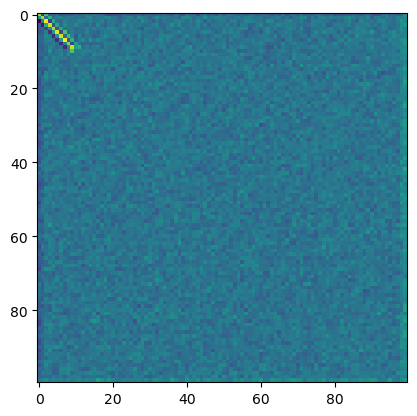

In [10]:
# test av variable step size integrator for dynamic low rank

t = 1.1
h = 1
tol = 10
k = 100
tf = 0.8

A = ex.A(0, epsilon = 1/2)
A_dot = ex.A_dot(0, epsilon = 1/2)
U, S, V = vssi.construct_U_S_V_0_k(k)

Y,j = vssi.variable_solver(0,tf,A_dot,tol,h,dlr.second_order_method,k)
Yt = vssi.format_result(A_dot,Y)

print(np.linalg.norm(Yt[0,:,:]-A,'fro'))




In [ ]:
# test av variable step size integrator for time_integration_low_rank.py
t0 = 0
m = 10
n = 10
tf = 1
k = 8

A = tilr.A_fun(t0,m,n)
A_dot = tilr.A_dot_fun(t0,m,n)

Y,j = vssi.variable_solver(t0,tf,A_dot,tol,h,tilr.second_order_method,k)
Yt = vssi.format_result(A_dot,Y)


print(np.linalg.norm(Yt-A))

15846.65888209858
